In [ ]:
# import Python packages

!pip install imutils

# from TensorFlow
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import add
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.utils import to_categorical

# from sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# other imports
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from imutils import paths
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# connect to Neo Ann Yi's Kaggle
!pip install git+https://github.com/Kaggle/kaggle-api.git --upgrade
import os
credentials = {"username":"annelieseneo","key":"acc8c4a3cdce5b06fb2bc55778aa4028"}
os.environ['KAGGLE_USERNAME']=credentials["username"]
os.environ['KAGGLE_KEY']=credentials["key"]

# import dataset
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip -o face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [ ]:
# dataset folder paths for with and without mask
mask = "/content/data/with_mask"
nomask = "/content/data/without_mask"

In [ ]:
# loading all images and their labels in mask, with mark
print("Loading images...")
Img_Paths = list(paths.list_images(mask))
print("...Done")

Loading images...
...Done


In [ ]:
# loading all images and their labels, without mask
print("Loading images...")
Img_Paths2 = list(paths.list_images(nomask))

Loading images...


In [ ]:
# all images with mask
len(Img_Paths)

3725

In [ ]:
# all images without mask
len(Img_Paths2)

3828

In [ ]:
# image path of index number 330
Img_Paths[330]

'/content/data/with_mask/with_mask_1794.jpg'

In [ ]:
# image path of index number 40
Img_Paths2[40]

'/content/data/without_mask/without_mask_2594.jpg'

In [ ]:
fix = 0
fix1 = 0

In [ ]:
# find array index number of a file path, view specific images and varying shooting distances and angles, lightings, and postures
b = "/content/data/with_mask/with_mask_2120.jpg" # file path of image
for i in range(3725): # find from all images 
  if Img_Paths[i] == b : # find matching array index number
    fix = i

In [ ]:
# find array index number
c = "/content/data/without_mask/without_mask_3488.jpg"
for j in range(3828):
  if Img_Paths2[j] == c : 
    fix1 = j

'/content/data/with_mask/with_mask_2120.jpg'

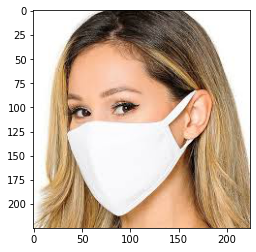

In [ ]:
# display sample image from dataset
sample1 = Image.open(Img_Paths[fix]) # at index 1000
plt.imshow(sample1) # plot image
sample1
Img_Paths[fix]

In [ ]:
# convert images from RBG to Gray Scale
import cv2 as cv
from google.colab.patches import cv2_imshow
gray_image = [] # array for gray scale with mask
gray_image2 = [] # array for gray scale without mask

for img in Img_Paths: # for with mask
  image = cv.imread(img)
  gray_image.append(cv.cvtColor(image, cv.COLOR_RGB2GRAY)) # convert

for img in Img_Paths2: # for without mask
  image = cv.imread(img)
  gray_image2.append(cv.cvtColor(image, cv.COLOR_RGB2GRAY)) # convert

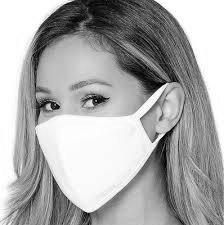

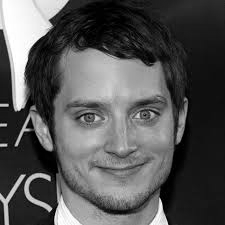

In [ ]:
# display an image from with mask and one from without mask, both at index 200
from google.colab.patches import cv2_imshow
cv2_imshow(gray_image[fix])
cv2_imshow(gray_image2[fix1])

In [ ]:
# resize images to 200 x 200 pixel size
resized_image = [] # array for resized with mask
resized_image2 = [] # array for resized without mask
IMG_SIZE = 200 # image pixel size

for img in gray_image: # for with mask
  resized_image.append(cv.resize(img, (IMG_SIZE, IMG_SIZE))) # resize

for img in gray_image2: # for without mask
  resized_image2.append(cv.resize(img, (IMG_SIZE, IMG_SIZE))) # resize

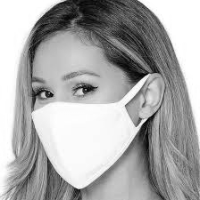

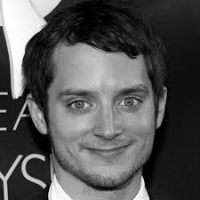

In [ ]:
# display the resize images
cv2_imshow(resized_image[fix])
cv2_imshow(resized_image2[fix1])

In [ ]:
# Image Enhancement : Histogram Equalization
hist_image = [] # array for histogram equalised with mask
hist_image2 = [] # array for histogram equalised without mask

for img in resized_image: # for with mask
  hist_image.append(cv.equalizeHist(img)) # Histogram Equalization

for img in resized_image2: # for without mask
  hist_image2.append(cv.equalizeHist(img)) # Histogram Equalization

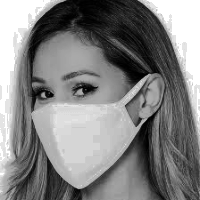

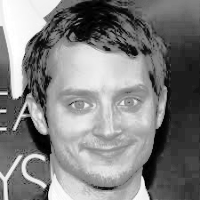

In [ ]:
# display the Histogram Equalised images
cv2_imshow(hist_image[fix])
cv2_imshow(hist_image2[fix1])

In [ ]:
# Image Restoration : Wiener filter 
from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
wiener_image = [] # array for wiener with mask
wiener_image2 = [] # array for wiener without mask

for img in hist_image: # for with mask
  wiener_image.append(wiener(img)) # Wiener filter 

for img in hist_image2: # for without mask
  wiener_image2.append(wiener(img)) # Wiener filter 

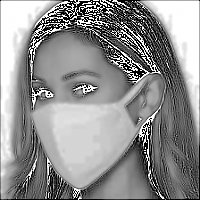

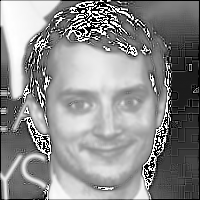

In [ ]:
# display the Wiener Restored images
cv2_imshow(wiener_image[fix])
cv2_imshow(wiener_image2[fix1])

In [ ]:
# Morphological Processing : Erosion
kernel = np.ones((5,5), np.uint8) # kernal at 5 x 5 kernel size
ero_image = [] # array for erosion with mask
ero_image2 = [] # array for erosion without mask

for img in wiener_image: # for with mask
  ero_image.append(cv2.erode(img, kernel, iterations=1)) # erode

for img in wiener_image2: # for without mask
  ero_image2.append(cv2.erode(img, kernel, iterations=1)) # erode

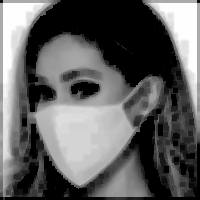

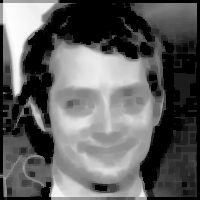

In [ ]:
# display the eroded images
cv2_imshow(ero_image[fix])
cv2_imshow(ero_image2[fix1])

In [ ]:
# Morphological Processing : Dilation
dil_image = [] # array for dilation with mask
dil_image2 = [] # array for dilation without mask

for img in ero_image: # for with mask
  dil_image.append(cv2.dilate(img, kernel, iterations=1)) # dilation

for img in ero_image2: # for without mask
  dil_image2.append(cv2.dilate(img, kernel, iterations=1)) # dilation

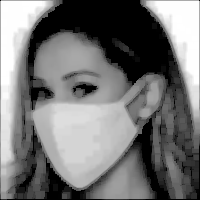

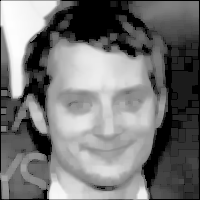

In [ ]:
# display the dilated images
cv2_imshow(dil_image[fix])
cv2_imshow(dil_image2[fix1])

In [ ]:
!pip install -U scikit-image

     |████████████████████████████████| 29.2MB 106kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [ ]:
# Image Segmentation : Thresholding
from skimage import filters
from skimage.filters import threshold_local
seg_image = [] # array for thresholding with mask
seg_image2 = [] # array for thresholding without mask

for img in dil_image: # for with mask
  (T, threshInv) = cv2.threshold(img, 120, 255,cv2.THRESH_TOZERO) # thresholding
  seg_image.append(threshInv)

for img in dil_image2: # for without mask
  (T, threshInv) = cv2.threshold(img, 120, 255,cv2.THRESH_TOZERO) # thresholding
  seg_image2.append(threshInv)

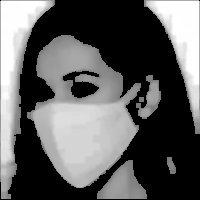

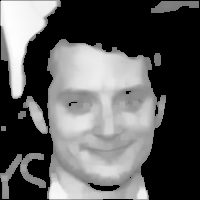

In [ ]:
# display thresholded images
cv2_imshow(seg_image[fix])
cv2_imshow(seg_image2[fix1])

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#only run once
#!mkdir '/content/drive/MyDrive/Preprocessed'
#!mkdir '/content/drive/MyDrive/Preprocessed/Mask'
#!mkdir '/content/drive/MyDrive/Preprocessed/NoMask'
#directory and file exists --> already created 

In [ ]:
#only run once
#count = 0 
#count2 = 0

 #pre-processed images with mask
#for img in seg_image[0:700]:
 # count += 1 
 # path = '/content/drive/MyDrive/Preprocessed/Mask' # sub-folder path for with mask
 # name = str(count) + '.jpg' # save in .jpg format
 # cv2.imwrite(os.path.join(path,name),img)

# pre-processed images without mask
#for img in seg_image2[0:150]:
 # count2 += 1 
 # path = '/content/drive/MyDrive/Preprocessed/NoMask' # sub-folder path for without mask
 # name = str(count2) + '.jpg' # save in .jpg format
 # cv2.imwrite(os.path.join(path,name),img)

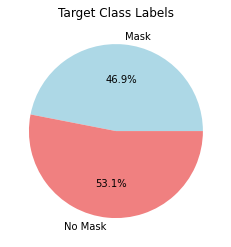

In [ ]:
# EDA : Pie Chart of Target Class Labels
dataset = os.listdir('/content/data')
a = int(len(mask)) # total images with mask
b = int(len(nomask)) # total images without mask
label = ['Mask','No Mask'] # label of slices
clrs = ['lightblue','lightcoral'] # colour of slices
x = np.array([a,b])
plt.pie(x, labels = label, autopct = '%1.1f%%', # numerical labels to 1 decimal place
        colors = clrs) # specify colours
plt.title('Target Class Labels') # title of pie chart
plt.show()

                 Before and After


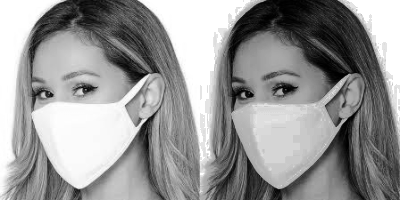

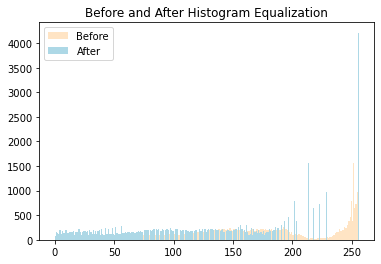

In [ ]:
# Comparison Column Chart
re = resized_image[fix] # image before Histogram Equalisation
hist = hist_image[fix] # image after Histogram Equalisation
print("                 Before and After")
res = np.hstack((re,hist)) # images before and after Histogram Equalisation
cv2_imshow(res) # show 2 images
# histogram before Histogram Equalisation
plt.hist(re.ravel(), bins = 256, range = [0,256], color = 'bisque') 
# histogram after Histogram Equalisation
plt.hist(hist.ravel(), bins = 256, range = [0,256], color = 'lightblue') 
plt.legend(['Before', 'After']) # legend of histogram chart
plt.title('Before and After Histogram Equalization') # title of chart
plt.show() # displat comparison histogram chart

In [ ]:
# *********************************************
# *********************************************
# *** RUN group3_cnn.ipynb or group3_cnn.py ***
# *** BEFORE RUNNING THE TESTING PART BELOW ***
# *********************************************
# *********************************************

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load model
import tensorflow_hub as hub
mymodel=tf.keras.models.load_model('/content/drive/MyDrive/dnn/mpg_model.h5', 
                                   custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
# test images to predict probability and classification of target class labels
def detect(path):
  img = plt.imread(path) # image path
  img = cv2.resize(img,(200,200)) # image size of 200 x 200 image size
  imageSegment  = np.array(img,dtype = 'uint8') 
  # predict probability of target class labels
  pred = mymodel.predict_classes(np.array([imageSegment])) 
  print(pred)
  if pred > 0.700: # predicted no mask
    imageSegment = cv2.rectangle(img, (5,5), (190,80), (255,0,0), 3) 
    imageSegment = cv2.putText(img, 'No Mask!', (30,50), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),3)
  else: # predicted mask
    imageSegment = cv2.rectangle(img, (5,5), (190,80), (0,255,0), 3) 
    imageSegment = cv2.putText(img, 'Mask', (60,50), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),3)
  plt.imshow(imageSegment) # display image

[0]


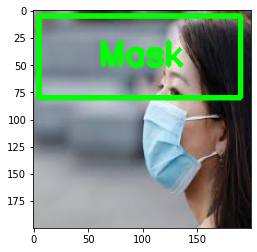

In [ ]:
# test a with mask image
detect('/content/data/with_mask/with_mask_2500.jpg')

[1]


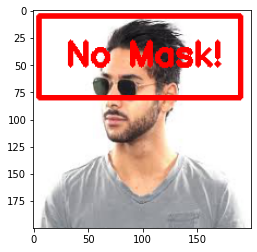

In [ ]:
# test a without mask image
detect('/content/data/without_mask/without_mask_2500.jpg')

In [ ]:
# Webcam for real-time face mask detection

# import dependencies, packages, and libraries
import time
import pickle
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html

In [ ]:
# import haarcascade_frontalface_default.xml to session folder 
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2021-06-18 03:00:48--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2021-06-18 03:00:49 (15.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create live video stream using webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start live streaming video from webcam
video_stream()
# use Haar Cascade Frontal Face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
label_html = 'Capturing...' # label for video
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    img = js_to_image(js_reply["img"]) # convert JS response to OpenCV Image
    bbox_array = np.zeros([480,640,4], dtype=np.uint8) # transparent overlay for bounding box
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # grayscale image for face detection
    faces = face_cascade.detectMultiScale(gray) # get face region coordinates
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      cv2.imwrite('temp.jpg',gray)
      test_image=image.load_img('temp.jpg',target_size=(200,200,3))
      test_image=image.img_to_array(test_image)
      test_image=np.expand_dims(test_image,axis=0)
      pred2=mymodel.predict_classes(test_image)
      if pred2 == 1.0 : # predict no mask
          bbox_array=cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),5)
      else: # predict mask
          bbox_array=cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),5)
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array) # convert overlay of bbox into bytes
    bbox = bbox_bytes # update bbox so next frame gets new overlay

<IPython.core.display.Javascript object>